In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

#Automcompletar rápido
%config IPCompleter.greedy=True

pd.options.display.max_columns = None

con = sa.create_engine('sqlite:///../Datos/airbnb.db')

df = pd.read_sql('df_ready', con = con)

#Minicubo:

metrics = ['total_price','purchase_price']
dimensions = ['bedrooms_discrete','accommodates_discrete','beds_discrete','number_of_reviews_discrete']

minicube_price = df[dimensiones + metricas]

minicube_price = minicubo_precio.melt(id_vars=['total_price','purchase_price'])

minicube_price = minicubo_precio.groupby(['variable','value'])[['total_price','purchase_price']].agg('median')

# CONTEXT ANALYSIS

The company has selected the city of Madrid as a candidate to look for properties in which to invest with the objective of obtaining profitability through tourist rentals.

To this end, before setting the valuation team to search for opportunities, management has commissioned the Data Science team to conduct a Discovery analysis to identify strategies or lines of work that will help direct the performance of the valuation team.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

#Automcompletar rápido
%config IPCompleter.greedy=True

pd.options.display.max_columns = None

con = sa.create_engine('sqlite:///../Datos/airbnb.db')

df = pd.read_sql('df_ready', con = con)

#Minicube:

metrics = ['total_price', 'purchase_price']
dimensions = ['bedrooms_discrete', 'accommodates_discrete', 'beds_discrete', 'number_of_reviews_discrete']
minicube = df[dimensions + metrics]
minicube_price = minicube.melt(id_vars = ['total_price', 'purchase_price'])
minicube_price = minicube_price.groupby(['variable', 'value'])[['total_price','purchase_price']].median()

# OBJECTIVES

* To analyze available public data sources
* To find insights that will help to understand the characteristics of the market in this city
* And guide the search work of the valuation team.
* Especially in terms of the main axes: rental price, occupancy levels and purchase price.

# Executive conclusions

* We have located 10 neighborhoods in which to focus the search.
* It is recommended to look for one-bedroom properties that can accommodate 3 guests.
* It is recommended to look for properties that being in one of the identified neighborhoods are not necessarily close to points of interest *(This conclusion must be taken with caution, because we only studied the relationship of the distance of the properties to a point of interest: Puerta del Sol, in a real context the analysis could be made to different types of points of interest such as museums, subway stations etc.)* 
* It is recommended to evaluate the development of a new product based on renting for specific moments of high interest.
* It is recommended to evaluate the development of a new product based on rentals for specific moments of high sports interest, especially in the neighborhood of San Blas.


# DETAILS OF THE MAIN RESULTS

## There are 10 neighborhoods with high investment potential

* We have located 10 neighborhoods that apriori can maximize the cost-income ratio.
* In addition we can segment them by the type of property quality in which we are interested in investing in 4 main groups
* These are the 10 neighborhoods where to start looking for specific opportunities:
    * **Low investment**: Simancas, Ambroz, Marroquina, San Juan Bautista.
    * **Medium Investment**: El Plantio, Valdemarín, Valdefuentes
    * **Medium-high investment**: Jerónimos, Fuentela reina
    * **High investment**: Recoletos

Exhibit 1.4.1

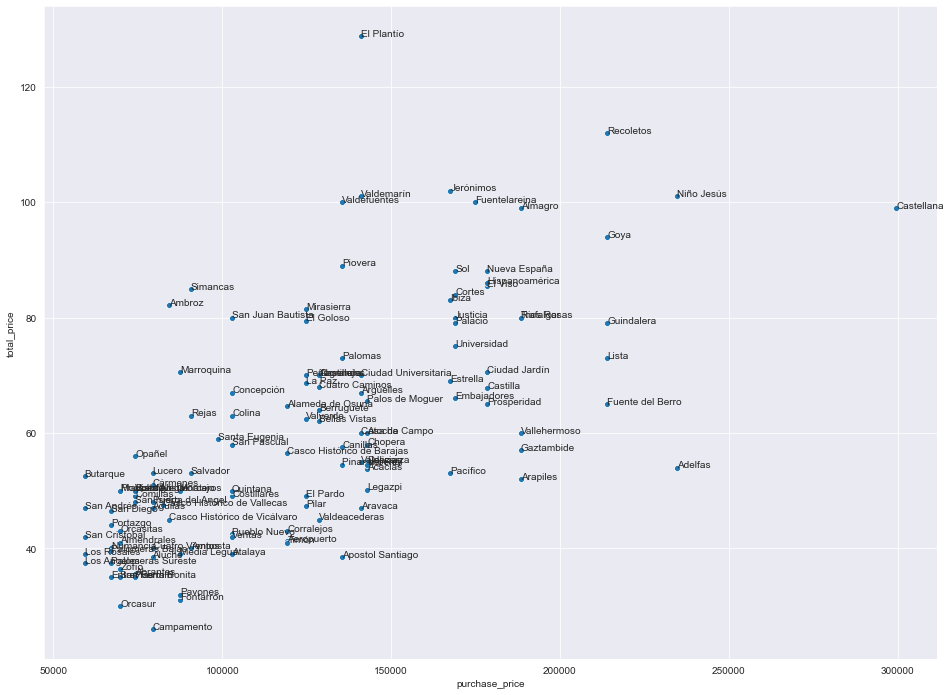

In [6]:
exclude = ['Rosas', 'Arcos', 'Canillejas', 'Hellín']

temp = df.groupby('neighbourhood')[['total_price','purchase_price']].median()

temp = temp[~temp.index.isin(exclude)]

plt.figure(figsize = (16,12))
sns.set_style('darkgrid')
sns.scatterplot(data = temp, x = 'purchase_price', y = 'total_price')
#labels
for i in range(0,temp.shape[0]):
    plt.text(temp.purchase_price[i], temp.total_price[i], temp.index[i])

##  Search for one-bedroom properties that allow for 3 guests

* The number of guests that maximizes the purchase price paid is 3.

Exhibit 1.4.2

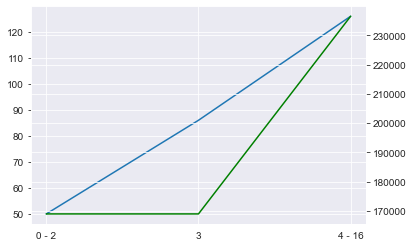

In [15]:
f, ax = plt.subplots()
ax.plot(minicube_price.loc['accommodates_discrete']['total_price'])
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['accommodates_discrete']['purchase_price'], color = 'g');

## Search for properties in one of the identified neighborhoods that are not necessarily close to points of interest.

* They are expected to have a lower purchase price.

* It seems that proximity to points of interest does not have a particular impact on the rental price. *(This conclusion must be taken with caution, because we only studied the relationship of the distance of the properties to a point of interest: Puerta del Sol, in a real context the analysis could be made to different types of points of interest such as museums, subway stations etc.)* 

Exhibit 1.4.3

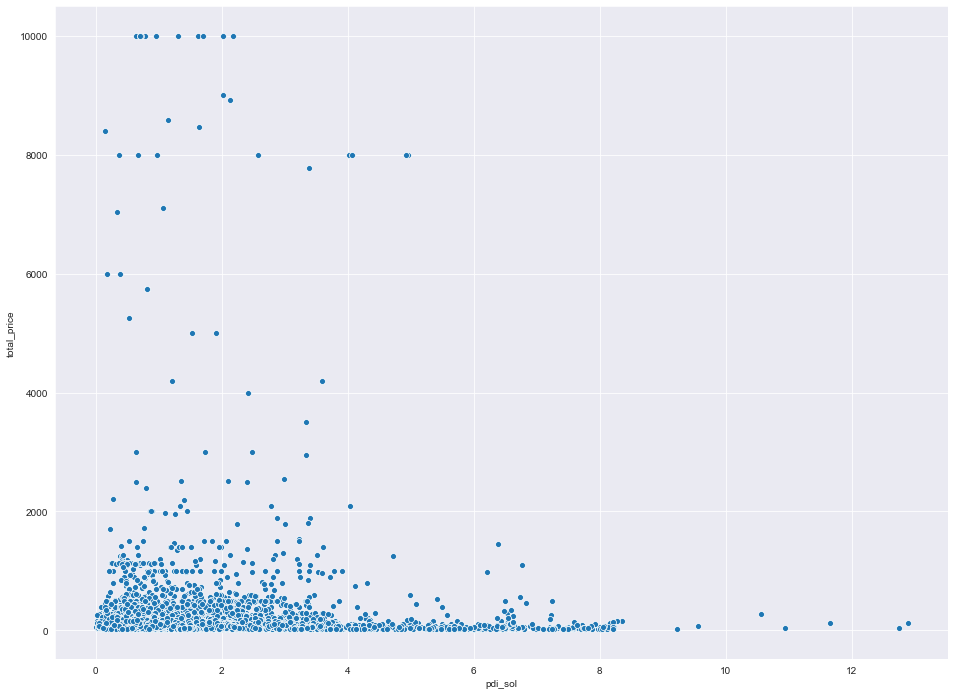

In [13]:
selection = df.groupby('distrito')['pdi_sol'].median().sort_values()[0:7].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df['distrito'].isin(selection)], x = 'pdi_sol', y = 'total_price' );

## Evaluate the development of a new product based on rental for specific moments of high sporting interest.

* Search for opportunities in the San Blas neighborhood.
* There are still many rentals that are not exploiting this potential.

Exhibit 1.4.4

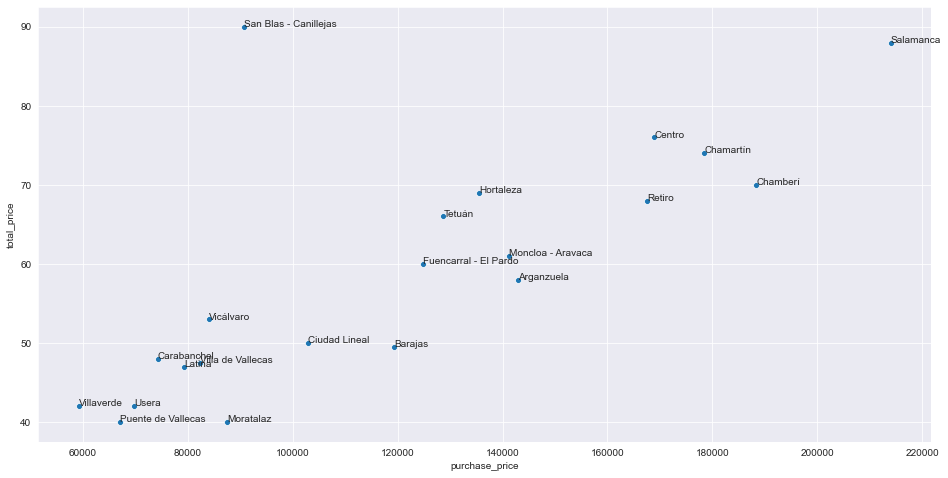

In [8]:
temporal = df.groupby('distrito')[['total_price', 'purchase_price']].median()

plt.figure(figsize = (16,8))
sns.scatterplot(data = temporal, x = 'purchase_price', y = 'total_price' )
for i in range(0, temporal.shape[0]):
    plt.text(temporal['purchase_price'][i], temporal['total_price'][i], temporal.index[i]); 

Exhibit 1.4.5

In [14]:
import folium

data = df[df.distrito == 'San Blas - Canillejas'].copy()

data['total_price_disc'] = pd.qcut(data['total_price'], q = [0, .25, .5, .75, 1.], 
                              labels=['yellow', 'orange', 'blue', 'red'])

mapa = folium.Map(location=[data.iloc[0,7], data.iloc[0,8]],zoom_start=14)

for flat in range(0,len(data)):
   folium.CircleMarker(
      location = [data.iloc[flat]['latitude'], data.iloc[flat]['longitude']],
      popup = data.iloc[flat]['purchase_price'],
      fill=True,
      color = data.iloc[flat]['total_price_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(mapa)

mapa